# Expected kinematic sky maps for simple Milky Way disk model

Calculate the expected sky maps of radial velocity and proper motion for an extremely simple model of the kinematics of the Milky Way disk. This is intended to roughly reproduce the motions of stars (here radial velocities) measured with respect to the solar system barycentre as a function of position on the sky.

## Milky Way toy kinematic model

In this model the Milky Way is in strict cylindrical differential rotation, with all stars on circular orbits around the Galactic centre, moving at speeds $V_{\phi,\star}=V_\phi(R_\star)$, where $V_\phi(R)$ is the circular speed which depends only the cylindrical radial coordinate $R$. The Sun is assumed to move at speed $V_{\phi,\odot} = V_\phi(R_\odot)$, the circular speed at the distance from the sun to the Galactic centre. This model can obviously be approximately correct only in the Galactic plane. The following schematic diagram shows the steps to calculate the radial velocity $v_\mathrm{rad}$ of the star with respect to the sun, __assuming both the sun and the star are exactly in the plane of the disk__.

<img src="DiskKinematicsVrad.png" width=80%/>

The sun and the star are located at $\mathbf{x}_\odot$ and $\mathbf{x}$ and moving with velocities $\mathbf{v}_\odot$ and $\mathbf{v}$. The Sun is located at $(-R_\odot,0,0)$. Expressed in terms of the cylindrical coordinates we have:

\begin{equation}
    \mathbf{x}_\odot = \begin{pmatrix} -R_\odot \\ 0 \\ 0 \end{pmatrix}\,, \quad
    \mathbf{x} = \begin{pmatrix} R\cos\phi \\ R\sin\phi \\ 0 \end{pmatrix}\,, \quad
    \mathbf{v}_\odot = \begin{pmatrix} 0 \\ -V_\phi(R_\odot) \\0 \end{pmatrix}\,, \quad
    \mathbf{v} = \begin{pmatrix} -V_\phi(R)\sin\phi \\ V_\phi(R)\cos\phi \\0 \end{pmatrix}
\end{equation}

The radial velocity of the star with respect to the sun is given by:

\begin{equation}
    v_\mathrm{rad} = \frac{\mathbf{x}-\mathbf{x}_\odot}{d} \cdot (\mathbf{v}-\mathbf{v}_\odot)\,,
\end{equation}

which works out to

\begin{equation}
    v_\mathrm{rad} = \frac{1}{d} \begin{pmatrix} R\cos\phi+R_\odot \\ R\sin\phi \\ 0 \end{pmatrix} \cdot
    \begin{pmatrix} -V_\phi(R)\sin\phi \\ V_\phi(R)\cos\phi+V_\phi(R_\odot) \\ 0 \end{pmatrix} =
    \frac{1}{d}\left(V_\phi(R_\odot)R - V_\phi(R)R_\odot \right)\sin\phi =
    \frac{R}{d}\left(V_\phi(R_\odot) - V_\phi(R)\frac{R_\odot}{R}\right)\sin\phi\,.
\end{equation}

From the drawing above it can be seen that $\sin\phi = (d\sin\ell)/R$ and $\cos\phi=(d\cos\ell-R_\odot)/R$ so that in the end we obtain:

\begin{equation}
    v_\mathrm{rad} = \left(V_\phi(R_\odot) - V_\phi(R)\frac{R_\odot}{R}\right)\sin\ell\,,
\end{equation}

where

\begin{equation}
    R = \left(d^2+R_\odot^2-2dR_\odot\cos\ell\right)^{1/2}\,.
\end{equation}

For the proper motions in $\ell$ and $b$ a similar calculation leads to:

\begin{equation}
    \mu_{\ell*} = \frac{V_\phi(R)}{A_\mathrm{v}R} + \frac{\cos\ell}{A_\mathrm{v}d}
    \left(V_\phi(R_\odot) - V_\phi(R)\frac{R_\odot}{R}\right)\,,\quad
     \mu_b = \frac{1}{A_\mathrm{v}d}
    \left(V_\phi(R)\frac{R_\odot}{R} - V_\phi(R_\odot)\right)\sin\ell\sin b\,,
\end{equation}

where $A_\mathrm{v}=4.74047...$ km yr s$^{-1}$ and distance is in parsec and velocity in km s$^{-1}$, resulting in proper motions in mas yr$^{-1}$.

The above equations hold whatever the values of $\ell$ and $d$. 

### More general calculation of the observed radial velocity and proper motions

A more general method to obtain a complete description of the velocity field in a differentially rotating stellar disk is presented in [Brunetti & Pfenniger (2010)](https://ui.adsabs.harvard.edu/#abs/2010A&A...510A..34B/abstract). Here we use vector astrometric methods to achieve the same for the __observed__ velocity field projected on the sky.

We now consider a star at distance $d$ and Galactic celestial coordinates $(\ell,b)$. To calculate the position, radial velocity, and proper motions of the star the normal triad $[\mathbf{p}, \mathbf{q}, \mathbf{r}]$ is used:

\begin{equation}
    \mathbf{p} = \begin{pmatrix} -\sin\ell \\ \cos\ell \\ 0 \end{pmatrix}\,,\quad
    \mathbf{q} = \begin{pmatrix} -\sin b\cos\ell \\ -\sin b\sin\ell \\ \cos b \end{pmatrix}\,,\quad
    \mathbf{r} = \begin{pmatrix} \cos b\cos\ell \\ \cos b\sin\ell \\ \sin b \end{pmatrix}\,.
\end{equation}

The star is located at:

\begin{equation}
    \mathbf{x} = d\mathbf{r}+\mathbf{x}_\odot
\end{equation}

Its radial velocity and proper motions are then given by:

\begin{equation}
    v_\mathrm{rad} = \mathbf{r}\cdot(\mathbf{v}-\mathbf{v}_\odot)\,,\quad
    \mu_\ell = \frac{1}{A_\mathrm{v}d}\mathbf{p}\cdot(\mathbf{v}-\mathbf{v}_\odot)\,,\quad
    \mu_b = \frac{1}{A_\mathrm{v}d}\mathbf{q}\cdot(\mathbf{v}-\mathbf{v}_\odot)\,,
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, rc
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LogNorm, Normalize
from matplotlib.patches import ArrowStyle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Circle

from scipy.stats import scoreatpercentile

import cartopy.crs as ccrs

import healpy as hp
from astropy.coordinates import ICRS, Galactic
from astropy.table import Table
import astropy.units as u

from pygaia.astrometry.vectorastrometry import normalTriad, cartesianToSpherical
import pygaia.astrometry.constants as pgc

/home/brown/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:907: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/brown/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:908: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/brown/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:909: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a 

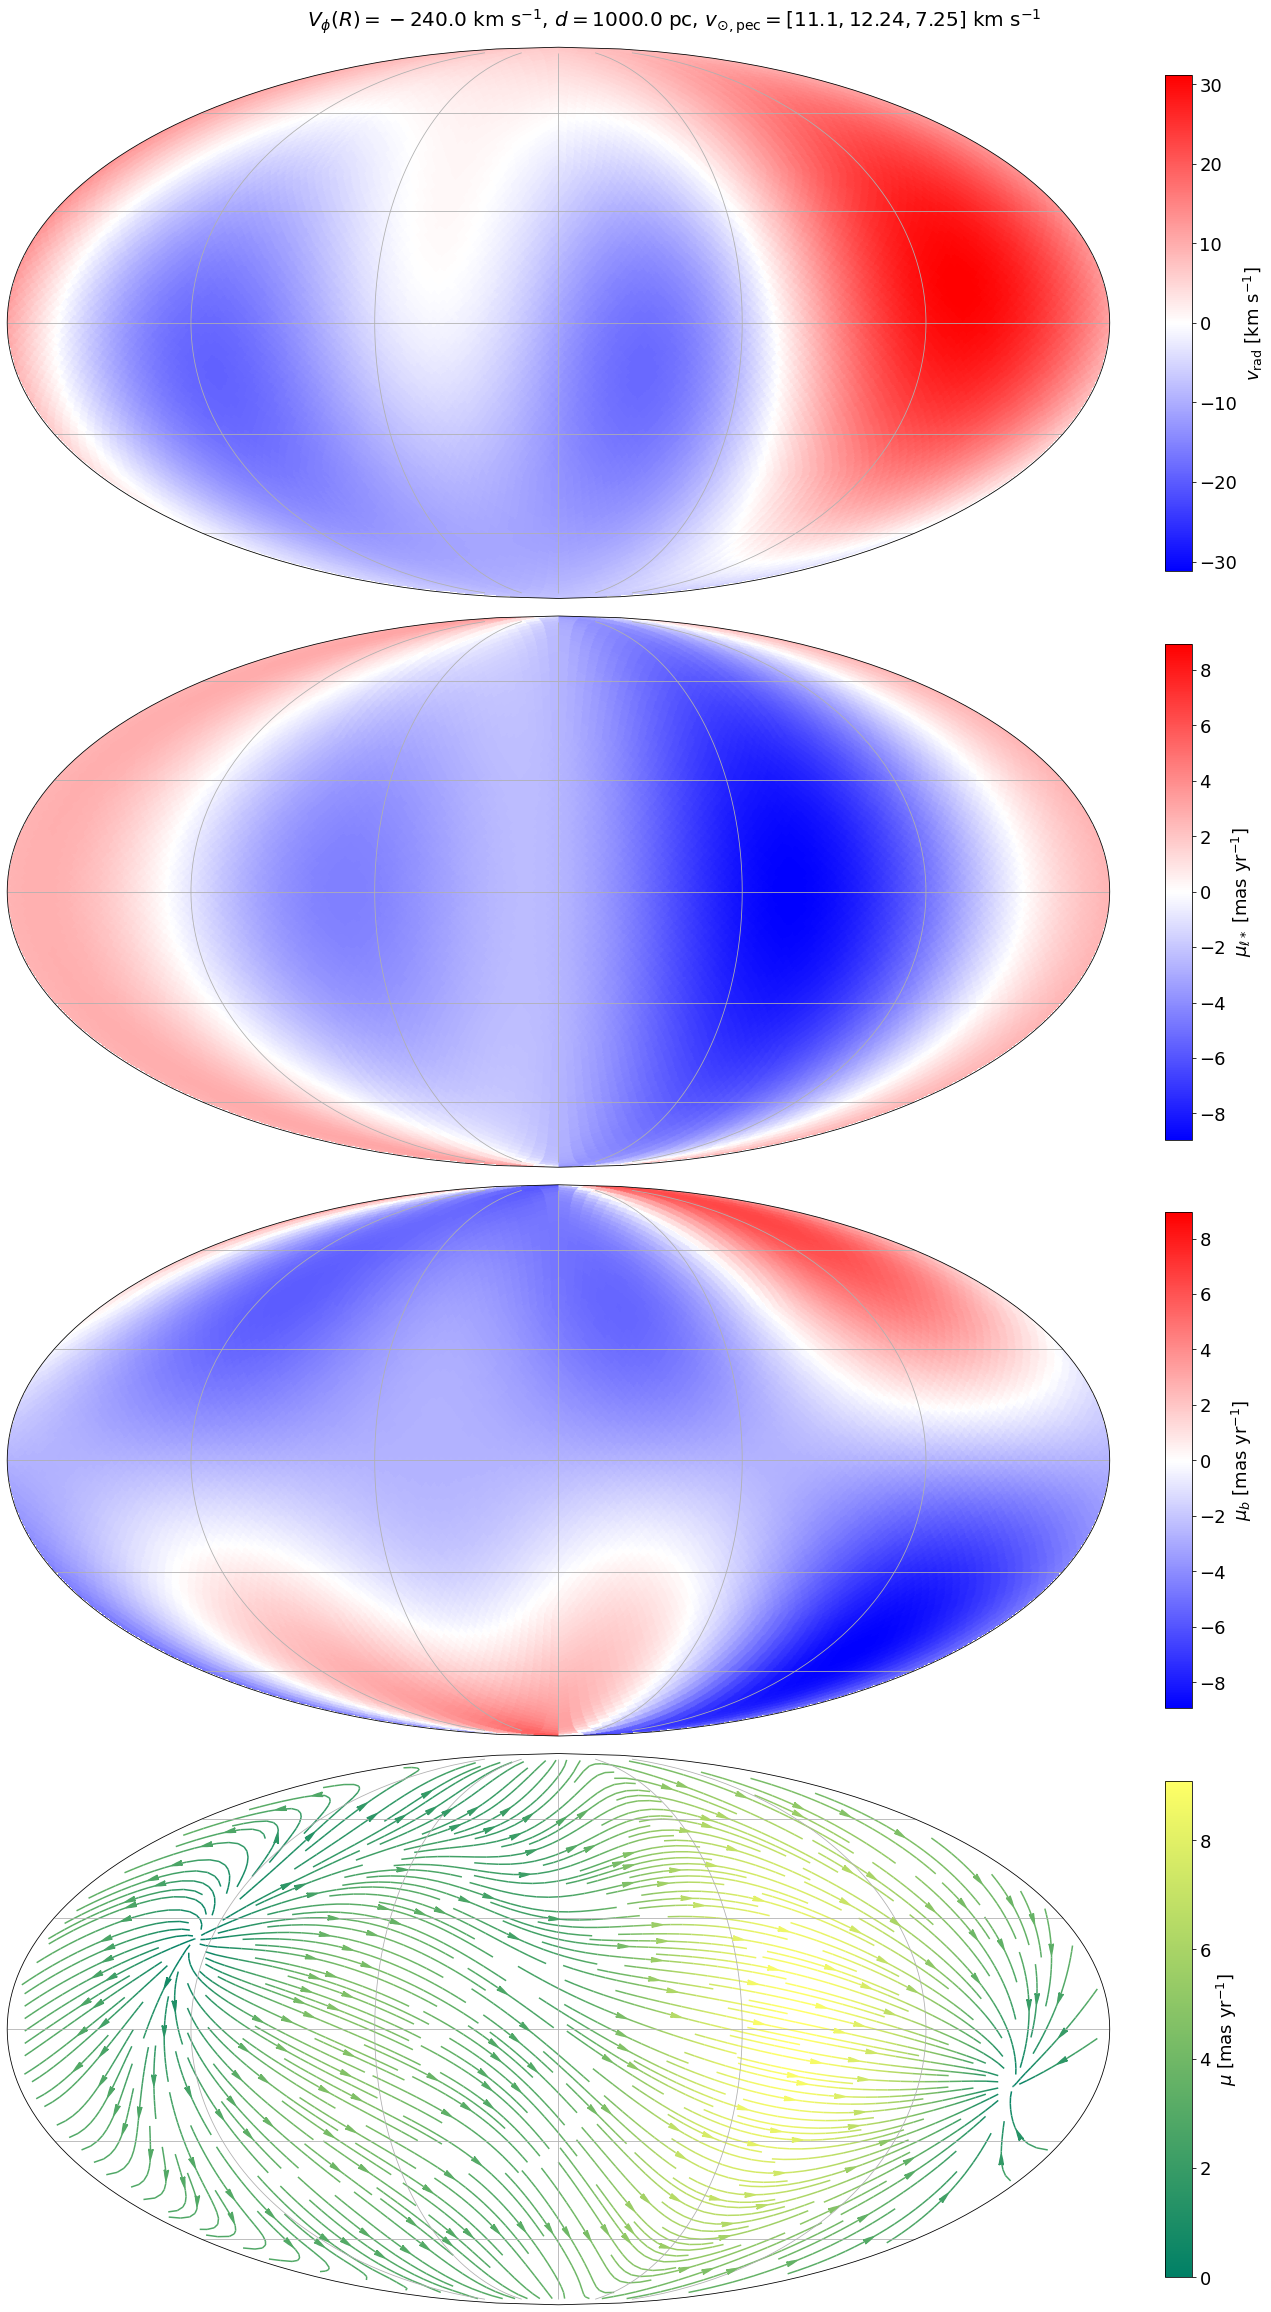

In [2]:
defaultProj = ccrs.PlateCarree()
skyProj = ccrs.Mollweide()

hplevel=5
nside = hp.order2nside(hplevel)
npix = hp.nside2npix(nside)
hpindices = np.arange(npix)
l, b = hp.pix2ang(nside, hpindices, lonlat=True, nest=True)
l = np.deg2rad(l)
b = np.deg2rad(b)

p, q, r = normalTriad(l,b)

distance = 1000.0
Rsun = 8178.0
zsun = 20.8
vphi = -240.0

sunpos = np.array([-Rsun, 0, 0])
#vsunpeculiar = np.array([0,0,0])
vsunpeculiar = np.array([11.1, 12.24, 7.25])
starpos = ((distance*r).T+sunpos).T

phi = np.arctan2(starpos[1,:], starpos[0,:])
phi[phi<0] = phi[phi<0]+2*np.pi

vsun = np.array([0, -vphi, 0])
vstar = np.vstack((-vphi*np.sin(phi), vphi*np.cos(phi), np.zeros_like(phi)))
vdiff = (vstar.T-(vsun+vsunpeculiar)).T

vrad = np.zeros(npix)
pml = np.zeros(npix)
pmb = np.zeros(npix)
for i in range(npix):
    vrad[i] = np.dot(r[:,i], vdiff[:,i])
    pml[i] = np.dot(p[:,i], vdiff[:,i])/(distance*pgc.auKmYearPerSec)*1000
    pmb[i] = np.dot(q[:,i], vdiff[:,i])/(distance*pgc.auKmYearPerSec)*1000
    
vradrange = [-np.abs(vrad).max(), np.abs(vrad).max()]
pmlrange = [-np.abs(pml).max(), np.abs(pml).max()]
pmbrange = [-np.abs(pmb).max(), np.abs(pmb).max()]

hpvradmap = hp.visufunc.cartview(vrad, coord=['G','G'], nest=True, title='', 
                             unit='[km/s]', cbar=False, notext=True, 
                             return_projected_map=True, flip='geo')
plt.close()
hppmlmap = hp.visufunc.cartview(pml, coord=['G','G'], nest=True, title='', 
                             unit='[mas/yr]', cbar=False, notext=True, 
                             return_projected_map=True, flip='geo')
plt.close()
hppmbmap = hp.visufunc.cartview(pmb, coord=['G','G'], nest=True, title='', 
                             unit='[mas/yr]', cbar=False, notext=True, 
                             return_projected_map=True, flip='geo')
plt.close()

rc('font', family='sans-serif', size=18)

fig=plt.figure(constrained_layout=True, figsize=(19,4*8))

gs = GridSpec(4, 2, figure=fig, width_ratios=[16,3])
#gs.tight_layout(fig)

axvrad=fig.add_subplot(gs[0,0], projection=skyProj)
imvrad = axvrad.imshow(hpvradmap, transform=defaultProj, cmap=cm.bwr, vmin=vradrange[0], vmax=vradrange[1])
axvrad.invert_xaxis()
axvrad.gridlines()
caxvrad = inset_axes(axvrad, "2.5%", "90%", loc='center left', 
                  bbox_to_anchor=(1.05, 0., 1, 1),
                  bbox_transform=axvrad.transAxes,
                  borderpad=0)
cbarvrad = fig.colorbar(imvrad, cax=caxvrad)
cbarvrad.set_label('$v_\mathrm{rad}$ [km s$^{-1}$]')

axpml=fig.add_subplot(gs[1,0], projection=skyProj)
impml = axpml.imshow(hppmlmap, transform=defaultProj, cmap=cm.bwr, vmin=pmlrange[0], vmax=pmlrange[1])
axpml.invert_xaxis()
axpml.gridlines()
caxpml = inset_axes(axpml, "2.5%", "90%", loc='center left', 
                  bbox_to_anchor=(1.05, 0., 1, 1),
                  bbox_transform=axpml.transAxes,
                  borderpad=0)
cbarpml = fig.colorbar(impml, cax=caxpml)
cbarpml.set_label('$\mu_{\ell*}$ [mas yr$^{-1}$]')

axpmb=fig.add_subplot(gs[2,0], projection=skyProj)
impmb = axpmb.imshow(hppmbmap, transform=defaultProj, cmap=cm.bwr, vmin=pmbrange[0], vmax=pmbrange[1])
axpmb.invert_xaxis()
axpmb.gridlines()
caxpmb = inset_axes(axpmb, "2.5%", "90%", loc='center left', 
                  bbox_to_anchor=(1.05, 0., 1, 1),
                  bbox_transform=axpmb.transAxes,
                  borderpad=0)
cbarpmb = fig.colorbar(impml, cax=caxpmb)
cbarpmb.set_label('$\mu_b$ [mas yr$^{-1}$]')

axpmfield=fig.add_subplot(gs[3,0], projection=skyProj)
axpmfield.invert_xaxis()
pmtot = np.sqrt(pml**2 + pmb**2)
pmcmap = cm.summer
axpmfield.streamplot(np.rad2deg(l), np.rad2deg(b), pml, pmb,
          transform=defaultProj, linewidth=1.5, density=3, color=pmtot, maxlength=0.5, arrowsize=1,
              arrowstyle=ArrowStyle.Fancy(head_length=1.0, head_width=.4, tail_width=.4), cmap=pmcmap)
axpmfield.gridlines()
caxpmfield = inset_axes(axpmfield, "2.5%", "90%", loc='center left', 
                  bbox_to_anchor=(1.05, 0., 1, 1),
                  bbox_transform=axpmfield.transAxes,
                  borderpad=0)
cbarpmfield = fig.colorbar(ScalarMappable(Normalize(vmin=0, vmax=pmtot.max()), cmap=pmcmap), cax=caxpmfield)
cbarpmfield.set_label('$\mu$ [mas yr$^{-1}$]')

vsunstr = np.array2string(vsunpeculiar, separator=',')
fig.suptitle(f'$V_\phi(R)={vphi}$ km s$^{{-1}}$, $d={distance}$ pc, $v_{{\odot,\mathrm{{pec}}}}={vsunstr}$ km s$^{{-1}}$', fontsize=20)

plt.savefig('KinematicsOnSkyToyMilkyWay.png')
plt.show()

## Calculate and plot the differential velocity field

The following plots show the velocity field in Cartesian galactocentric coordinates instead of the projections on the sky.

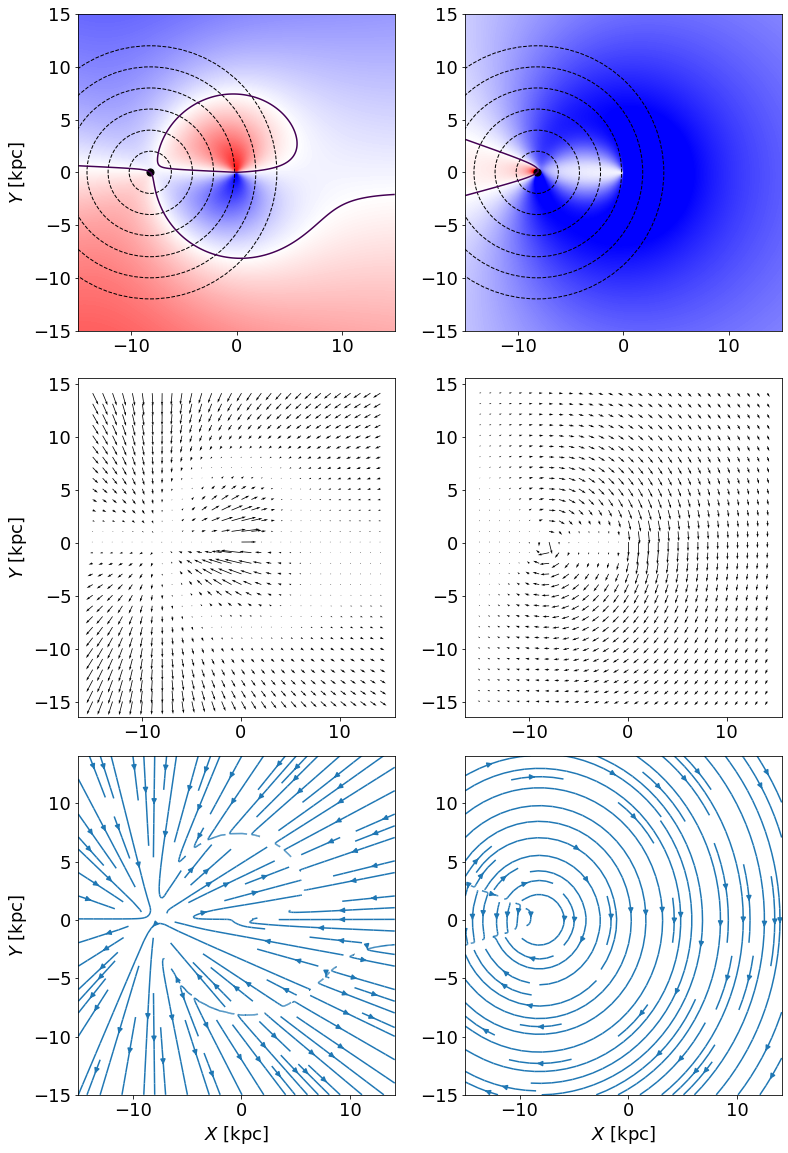

In [6]:
yy, xx = np.mgrid[-15:15:300j, -15:15:300j]
zz = np.zeros_like(xx)
sl = (slice(0,-1,10), slice(0,-1,10))

phi=np.arctan2(yy,xx)

Rsun_kpc = Rsun/1000
sunpos = np.array([-Rsun_kpc, 0, 0])
vsun = np.array([0, -vphi, 0])
vsunpeculiar = np.array([11.1, 12.24, 7.25])
vstar = np.stack((-vphi*np.sin(phi), vphi*np.cos(phi), np.zeros_like(phi)))
vdiff = vstar
for i in range(3):
    vdiff[i] = vdiff[i]-(vsun+vsunpeculiar)[i]

d_kpc, l, b = cartesianToSpherical(xx-sunpos[0], yy-sunpos[1], zz-sunpos[2])
p, q, r = normalTriad(l, b)

vrad = np.zeros_like(xx)
vl = np.zeros_like(xx)
vb = np.zeros_like(xx)
for i in range(300):
    for j in range(300):
        vrad[i,j] = np.dot(r[:,i,j], vdiff[:,i,j])
        vl[i,j] = np.dot(p[:,i,j], vdiff[:,i,j])/(d_kpc[i,j]*pgc.auKmYearPerSec)
        vb[i,j] = np.dot(q[:,i,j], vdiff[:,i,j])/(d_kpc[i,j]*pgc.auKmYearPerSec)
        
xsl = xx[sl]
ysl = yy[sl]
vradx = (r[0,:,:]*vrad)[sl]
vrady = (r[1,:,:]*vrad)[sl]
vlx = (p[0,:,:]*vl)[sl]
vly = (p[1,:,:]*vl)[sl]

fig=plt.figure(constrained_layout=True, figsize=(11,16))
gs = GridSpec(3, 2, figure=fig)

axradvelcont = fig.add_subplot(gs[0,0])
axradvelcont.imshow(vrad, origin='lower', extent=[-15,15,-15,15], cmap=cm.bwr,
                   vmin=-np.abs(vrad).max(), vmax=np.abs(vrad).max())
axradvelcont.contour(xx, yy, vrad, extent=[-15,15,-15,15], levels=[0])
axradvelcont.scatter(-Rsun/1000, 0, s=50, c='k')
circles = [Circle((-Rsun_kpc,0), i, fill=False, ls='--') for i in range(2,14,2)]
for i in range(len(circles)):
    axradvelcont.add_artist(circles[i])
axradvelcont.set_ylabel('$Y$ [kpc]')

axvmlcont = fig.add_subplot(gs[0,1])
axvmlcont.imshow(vl, origin='lower', extent=[-15,15,-15,15], cmap=cm.bwr, 
                 vmin=-7, vmax=7)
axvmlcont.contour(xx, yy, vl, extent=[-15,15,-15,15], levels=[0])
axvmlcont.scatter(-Rsun/1000, 0, s=50, c='k')
circles = [Circle((-Rsun_kpc,0), i, fill=False, ls='--') for i in range(2,14,2)]
for i in range(len(circles)):
    axvmlcont.add_artist(circles[i])

axradvelarrow = fig.add_subplot(gs[1,0])
axradvelarrow.quiver(xsl, ysl, vradx, vrady)
axradvelarrow.set_ylabel('$Y$ [kpc]')

axvlarrow = fig.add_subplot(gs[1,1])
axvlarrow.quiver(xsl, ysl, vlx, vly)

axradvel = fig.add_subplot(gs[2,0])
axradvel.streamplot(xsl, ysl, vradx, vrady)
axradvel.set_xlabel('$X$ [kpc]')
axradvel.set_ylabel('$Y$ [kpc]')

axvl = fig.add_subplot(gs[2,1])
axvl.streamplot(xsl, ysl, vlx, vly)
axvl.set_xlabel('$X$ [kpc]')

plt.show()